# Exploring a Dataframe on Google Play Store Applications

Scope of EDA includes deriving brief yet valuable insight regarding:
* Particular apps that stand out in the Google Play Store.
* How certain features/variables interact with eachother (multicollinearity).
* 5 visualisations supporting findings, as well as statistical calculations to confirm visualisation.
* Transform skewed features to prepare for predictive modelling.

## Load Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Import data
df = pd.read_csv("googleplaystore.csv")

## Data Preprocessing and Cleaning

In [3]:
#Seeing what the data looks like with .info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [4]:
# Dropping NAs
df1 = df.dropna()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB
None


In [5]:
df1.drop(['Current Ver', 'Android Ver', 'Size', 'Genres', 'Last Updated'], axis=1, inplace=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Installs        9360 non-null   object 
 5   Type            9360 non-null   object 
 6   Price           9360 non-null   object 
 7   Content Rating  9360 non-null   object 
dtypes: float64(1), object(7)
memory usage: 658.1+ KB
None


C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2311431635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Current Ver', 'Android Ver', 'Size', 'Genres', 'Last Updated'], axis=1, inplace=True)


In [6]:
# Correcting data types
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [7]:
# Converting 'Installs' & Price to string before removing symbols
df1['Installs'] = df1['Installs'].astype(str)
df1['Price'] = df1['Price'].astype(str)
df1['Reviews'] = pd.to_numeric(df1['Reviews'], errors='coerce')
df1['Type'] = (df1['Type'].str.lower() == 'free').astype(int)
df1.dtypes

C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\3668868949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].astype(str)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\3668868949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = df1['Price'].astype(str)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\3668868949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

App                object
Category           object
Rating            float64
Reviews             int64
Installs           object
Type                int64
Price              object
Content Rating     object
dtype: object

In [8]:
# Removing any non numeric characters before converting to string
df1['Installs'] = df1['Installs'].str.replace('+', '', regex=False)
df1['Installs'] = df1['Installs'].str.replace(r'[^\d.]', '', regex=True)
df1['Price'] = df1['Price'].str.replace('$', '', regex=False)
df1['Price'] = df1['Price'].str.replace(r'[^\d.]', '', regex=True)

C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2729938090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].str.replace('+', '', regex=False)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2729938090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = df1['Installs'].str.replace(r'[^\d.]', '', regex=True)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2729938090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:
# Now we can finally return the Installs and Price columns to numeric type
df1['Installs'] = pd.to_numeric(df1['Installs'], errors='coerce')
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\628625367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Installs'] = pd.to_numeric(df1['Installs'], errors='coerce')
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\628625367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')


In [10]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 658.1+ KB


Data looks clean, no missing values, subsetted to eight desired columns, data types corrected, ready for exploratory analysis

## Exploratory Data Analysis

### Statistics and Summary

Using .describe() function to gain a preliminary understanding of our data

In [11]:
df1.describe()

,Rating,Reviews,Installs,Type,Price
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.931090,0.961279
std,0.515263,3.145023e+06,9.126637e+07,0.253315,15.821640
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,1.000000,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,1.000000,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,1.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000


* Rating: the mean is 4.19 with a standard deviation of 0.52.
* Reviews: The mean is 514,376 reviews. This is heavily right-skewed, so we should expect a small number of apps with very high review counts.
* Installs: The mean is 17.9 million, and the maximum is 1 billion installs. This suggests a heavy skew (some apps have a huge number of installs).
* Type: Most apps seem to be "free", with only a few paid apps (since the median is 1 and the max is 1), consider this has been formatted as a boolean type.
* Price: The mean price is 0.96 (most apps are free). The max price is 400, indicating premium apps are present, consider that this is in cents, so 400 = $4.00

### Visualisation (Univariate Analysis)

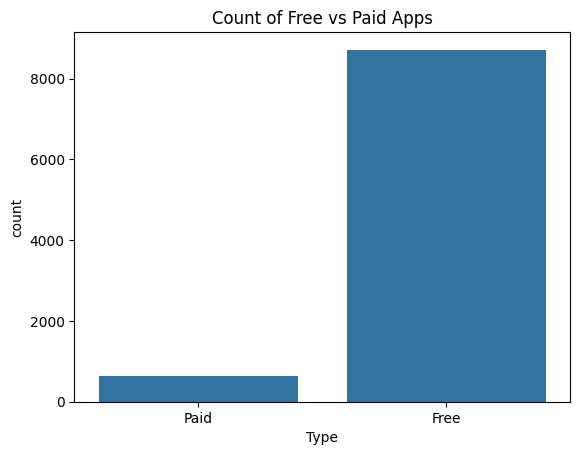

In [12]:
# Let us create a barplot to see the difference in free and paid apps
# Visualisation using pyplot
sns.countplot(x='Type', data=df1)
plt.xticks(ticks=[0, 1], labels=['Paid', 'Free'])
plt.title('Count of Free vs Paid Apps')
plt.show()

* Majority of the apps (above 8000) from our dataset are Free

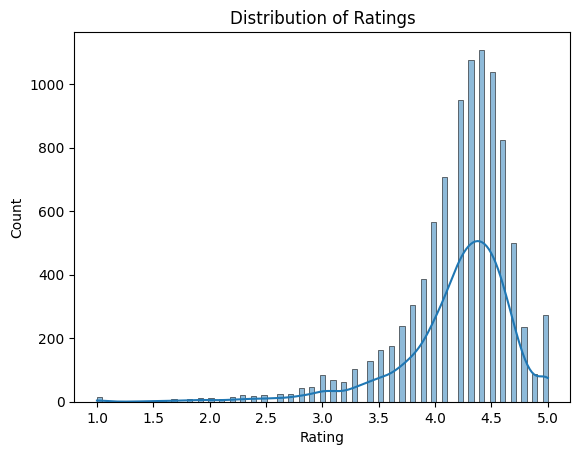

In [13]:
# Visualising distributions
sns.histplot(df1['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

* This confirms the right skewdness observed in the statistics summary; a log transform may be warranted for further analysis, make note.

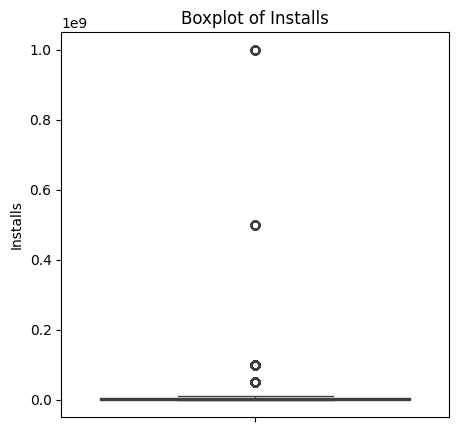

In [14]:
# Set up the matplotlib figure
# A log transform is warranted to view the boxplot properly
plt.figure(figsize=(5, 5))
# Create the boxplot
sns.boxplot(data=df1['Installs'])
# Set the title and display the plot
plt.title('Boxplot of Installs')
plt.show()

* Since we didn't transform the 'Installs' column, the boxplot shows us clear outliers, let us create a dataframe to see which apps these are

In [15]:
# Calculating Q1 and Q3 for the Installs column
Q1 = df1['Installs'].quantile(0.25)
Q3 = df1['Installs'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df1[(df1['Installs'] < lower_bound) | (df1['Installs'] > upper_bound)]

# Display the table with outliers
outliers_table = outliers[['App', 'Installs']] 
outliers_table
# let us now see the top ten outliers
top10outliers_installs = outliers_table.head(10)
top10outliers_installs

,App,Installs
3,Sketch - Draw & Paint,50000000
139,Wattpad 📖 Free Books,100000000
143,Amazon Kindle,100000000
152,Google Play Books,1000000000
188,Indeed Job Search,50000000
192,Docs To Go™ Free Office Suite,50000000
194,OfficeSuite : Free Office + PDF Editor,100000000
201,Facebook Pages Manager,50000000
225,Secure Folder,50000000
292,Docs To Go™ Free Office Suite,50000000


* Here we have our top ten installed apps from the google play store data set:
 *  Google Play Books with 1000000000+ Installs
* Since this table was inclusive of lower quartile outliers we see that the true outliers are the mostly installed apps, and suggests there are a large number of apps that haven't had many installs

### Visualisation (Bivariate Analysis)

let us see if visually any bivariate relationships exist before confirming via statistical formulae

C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2611566577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Log_Installs'] = np.log(df1['Installs'] + 1)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2611566577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Log_Reviews'] = np.log(df1['Reviews'] + 1)
C:\Users\tzork\AppData\Local\Temp\ipykernel_39932\2611566577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

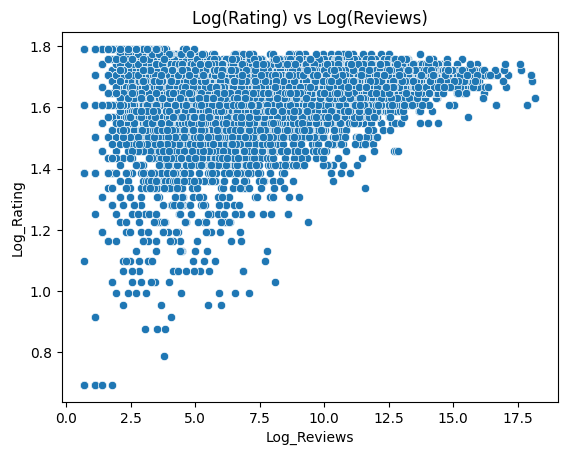

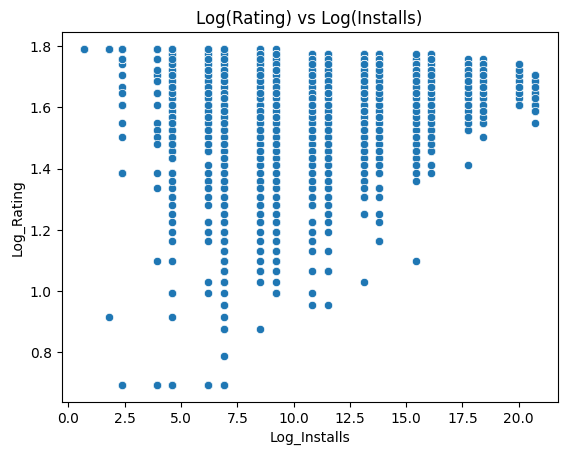

In [16]:
# Log transform the 'Installs' and 'Reviews' columns (adding 1 to avoid log(0) issues)
df1['Log_Installs'] = np.log(df1['Installs'] + 1)
df1['Log_Reviews'] = np.log(df1['Reviews'] + 1)
df1['Log_Rating'] = np.log(df1['Rating'] + 1)

# Rating vs Log(Reviews) scatterplot
sns.scatterplot(x='Log_Reviews', y='Log_Rating', data=df1)
plt.title('Log(Rating) vs Log(Reviews)')
plt.show()

# Rating vs Log(Installs) scatterplot
sns.scatterplot(x='Log_Installs', y='Log_Rating', data=df1)
plt.title('Log(Rating) vs Log(Installs)')
plt.show()

There is a lot to be derived from the Log_Rating vs Log_Reviews scatterplot, it seems as if there is greater Rating variance for an app with lower reviews, whereas apps with greater number of reviews have a lower variance, an explanation may be that if an app has a greater impact on the user and compels them to leave a review, it is for a positive reason. This also opens up a suggestion of multicollinearity of the Reviews feature with the Installs feature.
However, this suggestion appears false in the second scatterplot where the correlation between Log_Ratings and Log_Installs seems to be near 0.

### Correlations & Interactions

Let us test for correlation and multicollinearity between Log_Installs and Log_Reviews

Pearson Correlation between Log_Reviews and Log_Installs:
              Log_Reviews  Log_Installs
Log_Reviews       1.00000       0.95768
Log_Installs      0.95768       1.00000


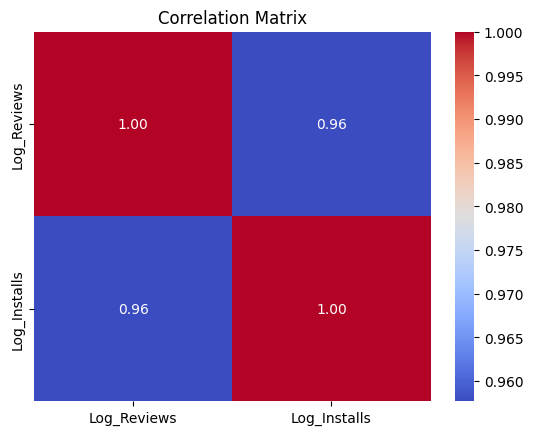

In [17]:
# Pearson correlation
correlation = df1[['Log_Reviews', 'Log_Installs']].corr()
print("Pearson Correlation between Log_Reviews and Log_Installs:")
print(correlation)

# Heatmap for correlation matrix
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* It is clear here that the two features are highly correlated; if we were to build a regression model could we use them both, are they collinear?

In [18]:
# Creating a new dataframe from the columns we want, and dropping NAs 
X = df1[['Log_Reviews', 'Log_Installs']].dropna()

# Add constant column (intercept) for VIF calculation
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
        Feature        VIF
0         const  20.852958
1   Log_Reviews  12.070128
2  Log_Installs  12.070128


* Suspicion of extremely high multicollinearity has been confirmed through VIF above, all greater than 10, and so if regression models built one of the above features must be removed to reduce redundancy

### Conclusion of EDA

Key Insights: 
* Most apps are free
* There are a small number of apps with extremely high review counts, the highest is Google Book Store with +1 billion installs.
* Heavy right skew in the reviews and Installs columns were corrected with log transform, as well as rating for standardised comparison.

Next Steps:
* Drop either Installs or Reviews feature prior to predictive modelling due to high multicollinearity.
* Consider further exploration of how Price interacts with other features.